# Problem Statement:

Recommend the steps to retain existing telecom customers. In the industry retaining customers is going challenging day by day and acquire new customers is even draining so retaining the existing customers is highly worths every effort than acquiring new customers.

Know the customer behavior and recommend the steps to retain existing customers and build the model to know which existing customers may leave.
Recommend the steps to retain existing telecom customers.
Build customer churn, prediction model.

#### Importing libraries


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier





##### Importing the Dataset

In [72]:
cca=pd.read_csv("./telecom_churn.csv")
cca.head(20).style.background_gradient(cmap='Blues')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000
1,0,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000
2,0,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000
3,0,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000
4,0,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000
5,0,118,0,0,0.000000,0,223.400000,98,57.000000,11.030000,6.300000
6,0,121,1,1,2.030000,3,218.200000,88,87.300000,17.430000,7.500000
7,0,147,0,0,0.000000,0,157.000000,79,36.000000,5.160000,7.100000
8,0,117,1,0,0.190000,1,184.500000,97,63.900000,17.580000,8.700000
9,0,141,0,1,3.020000,0,258.600000,84,93.200000,11.100000,11.200000


### Lets Try To Understand our Data

In [73]:
cca.shape

(3333, 11)

In [74]:
cca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [75]:
cca.describe().style.background_gradient(cmap='Oranges')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


checking for null values

<AxesSubplot:>

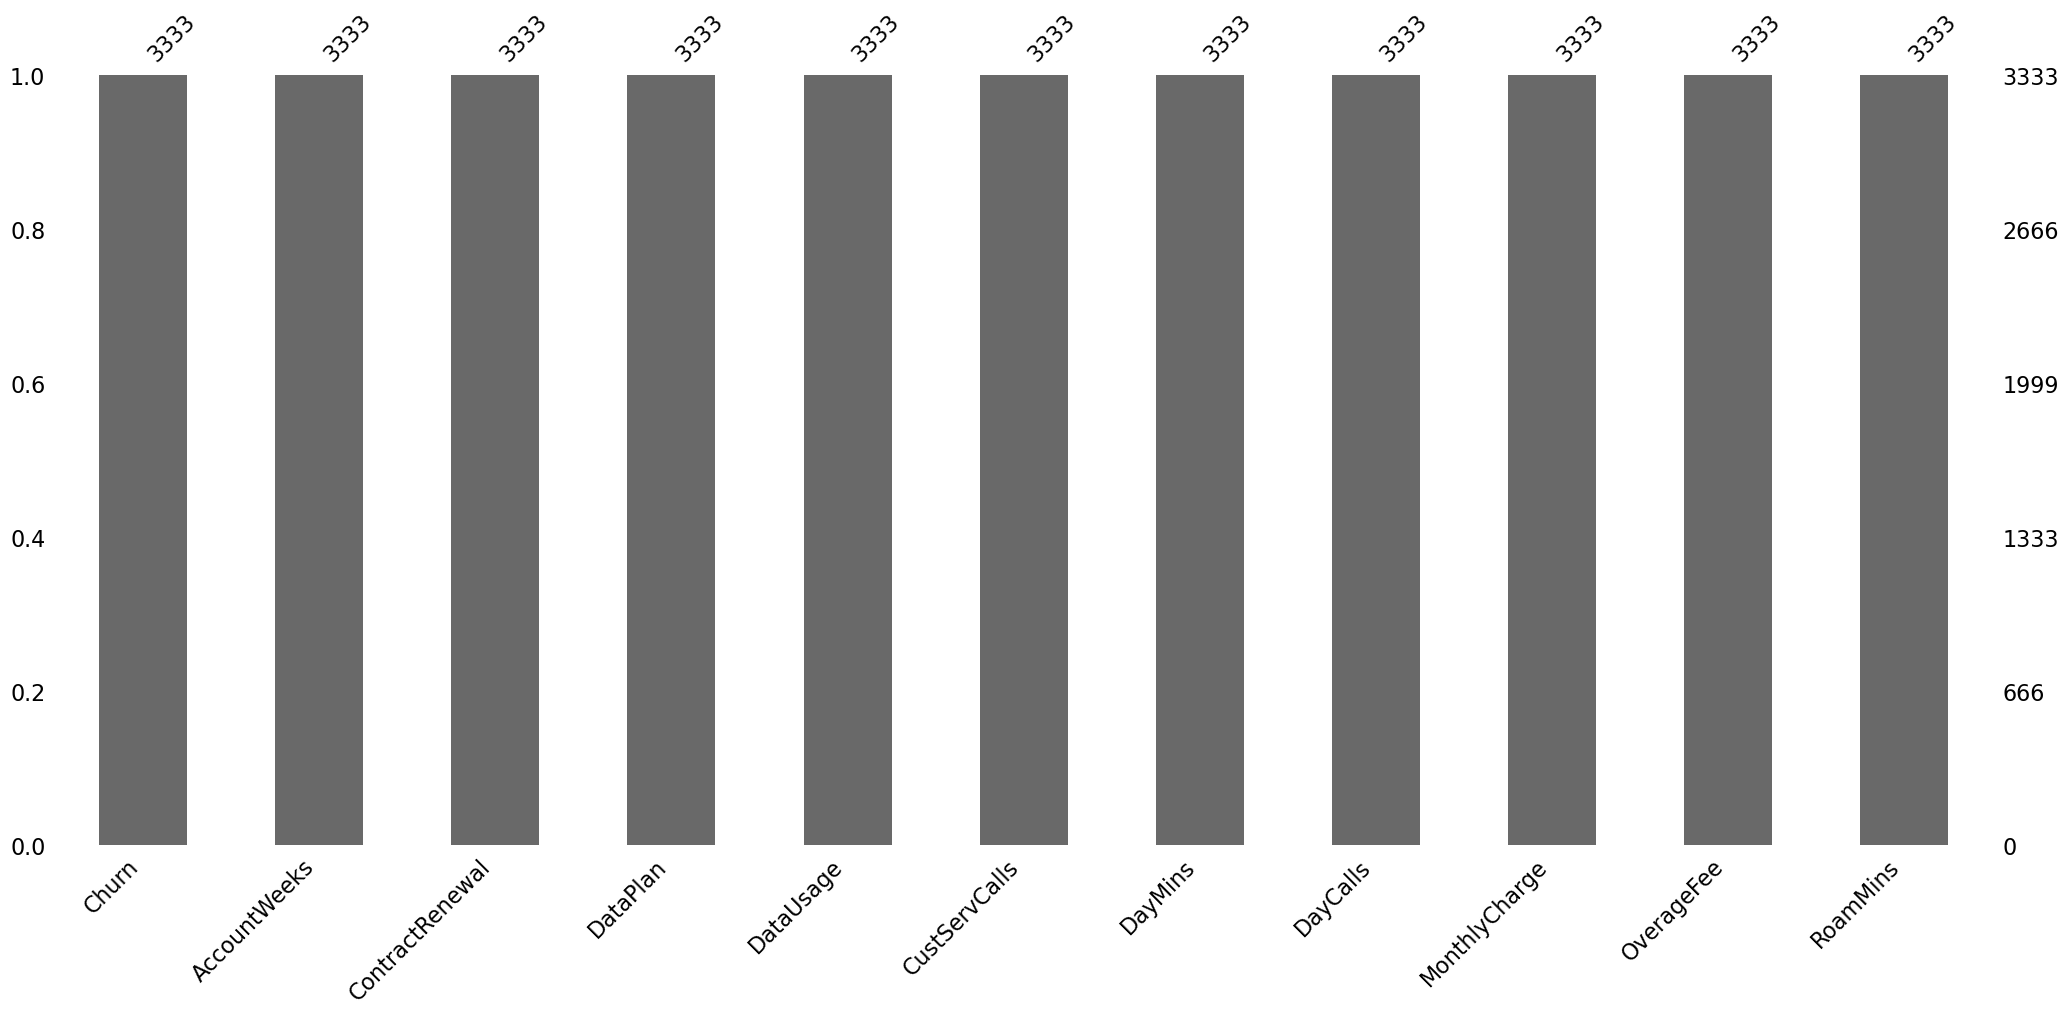

In [76]:
mn.bar(cca)

In [77]:
cca.isnull().sum().sum()

0

In [78]:
cca.duplicated().value_counts()

False    3333
dtype: int64

In [79]:
cca.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

Conclusion:

1. we have 11 cloumns and 3333 rows and all the columns are Numerical and there is no categorical column

2. The Data is Clean with No null values and No duplicate values

### Adding A New Feature

In [80]:
cca['Totalcharges']=cca.MonthlyCharge + cca.OverageFee
cca['Totalcharges'].describe()


count   3333.00
mean      66.36
std       17.31
min       19.38
25%       54.01
50%       64.03
75%       77.03
max      123.63
Name: Totalcharges, dtype: float64

## Visualisations

### Univariate Analysis

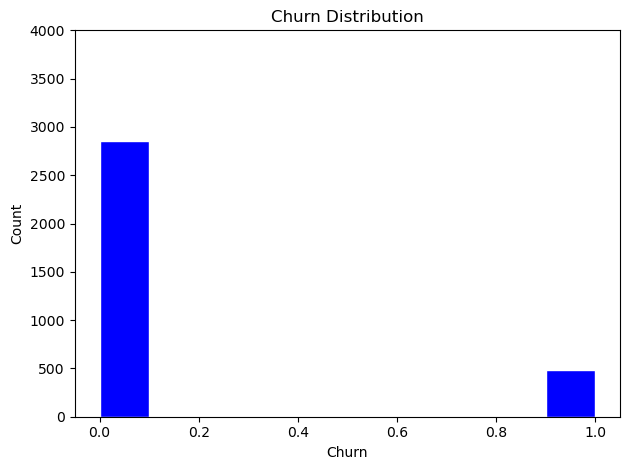

In [81]:
#Churn Distribution
plt.hist(cca['Churn'], color='blue', edgecolor='white')

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.ylim(0, 4000)

plt.tight_layout()

plt.show()


#### Insights

1. Churn Count is roughly about 15 percent That means Retention Rate is Moderate


In [82]:
def hist(df, x,y):
    plt.hist(df[x], color=y, edgecolor='white')
    plt.title(f"{x} Distribution")
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show()


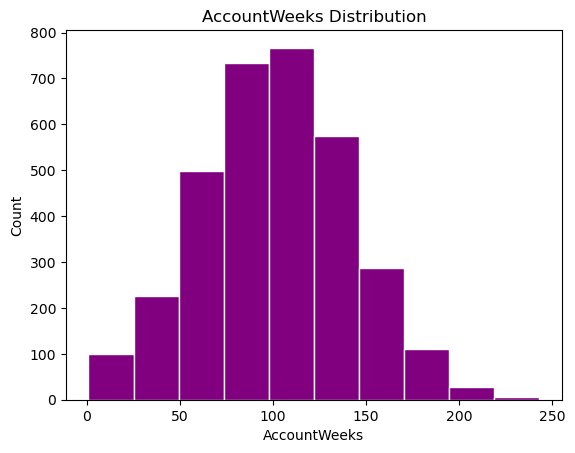

In [83]:
#Accounts weeks Histogram
hist(cca,'AccountWeeks','purple')

#### Insight
1. The average time the Customers have been associated with the company is Around 100 weeks

2. There are few Customers using the services over 200 weeks and few new customers as well

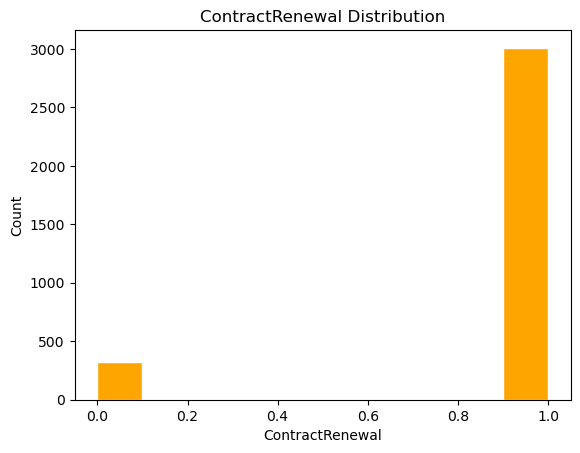

In [84]:
#Contract Renewal Histogram
hist(cca,'ContractRenewal','orange')

#### Insights
1. The above Graph clearly Indicates That Most of the customers Renewed there Contract

2. There Are few percentage of people who did not renew the contract will be our Main focus

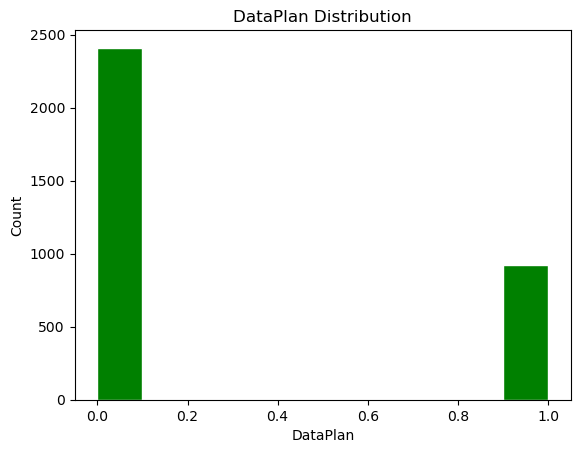

In [85]:
#Data Distribution Histogram
hist(cca,'DataPlan','green')

#### Insights

1.The above Graph indicates that Only a limited people Have a Data-plan  

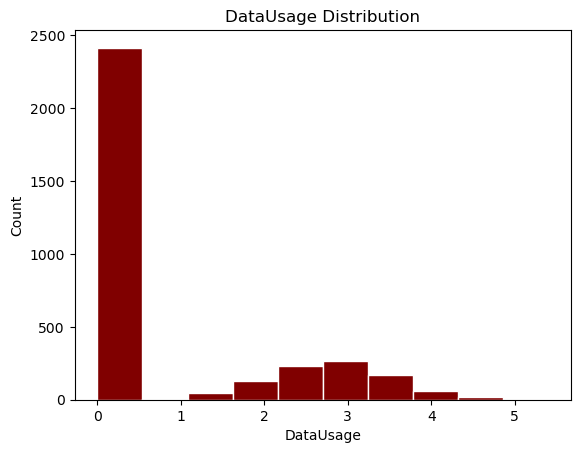

In [86]:
#Data Useage Histogram
hist(cca,'DataUsage','maroon')

#### Insights
1. Most of the customers Are not Using Data Services this is a concern that needs to be looked upon

2. Maximum Data user by any customer is 3Gb 


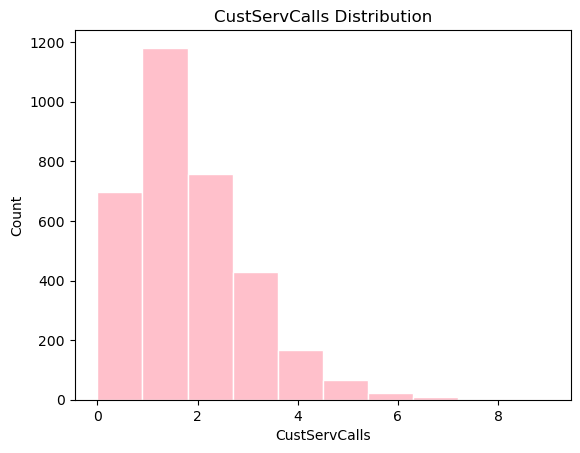

In [87]:
#### Customer Calls Distribution
hist(cca,'CustServCalls','pink')

#### Insights
1. Average Customer service Calls is 2 

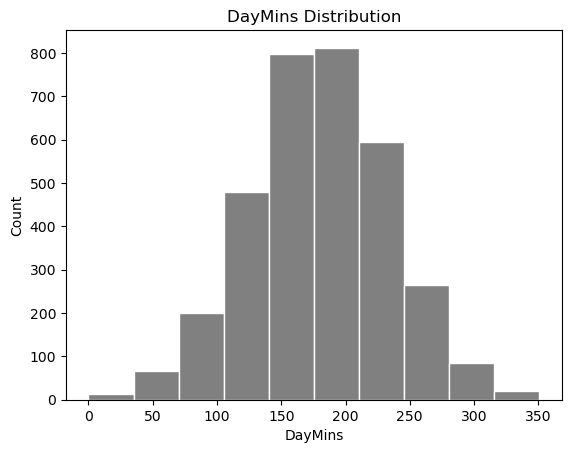

In [88]:
#### Day Mins Distributions
hist(cca,'DayMins','grey')

#### Insights
1. On an Average Customers Used Used For 180Mins

2. Few People are Using for less than 10 mins and there are few who are using for over 300mins

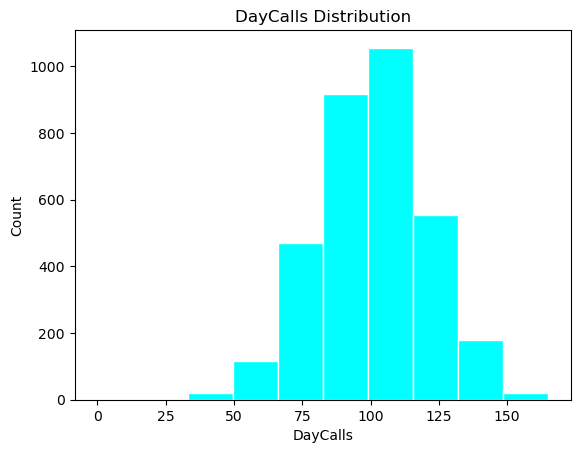

In [89]:
# Day calls Distribution
hist(cca,'DayCalls','aqua')

#### Insights

1. On an Average Customers mak 100 Calls

2. A Number of Customers make less Than 50 calls and Few Customers make more than 150 calls 

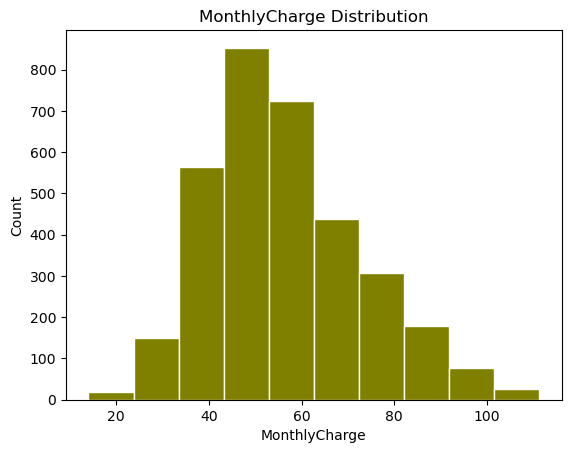

In [90]:
# Monthly Charge Distribution
hist(cca,'MonthlyCharge','olive')

#### Insights 

1. Average Monthly Charge of Customers is 55 

2. A large segement of customers Have a monthly charge below 50 an even Lesser

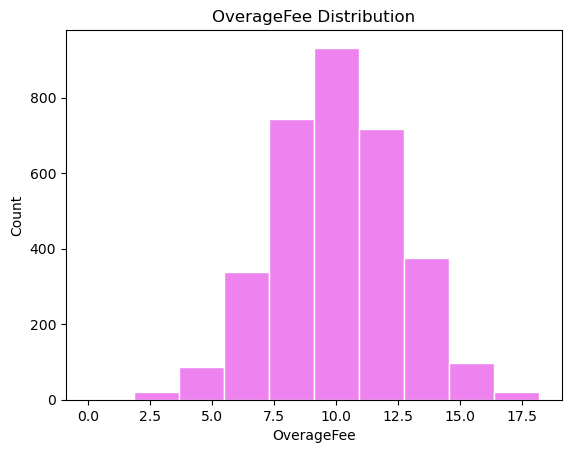

In [91]:
#overage Fee Disribution
hist(cca,'OverageFee','violet')

#### Insights

1.Most of the customers have Overage Fee and majority of them have over 10 Dollars i.e a significant Amount


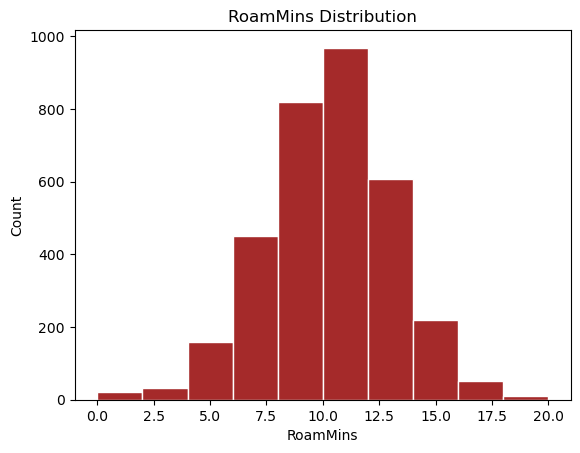

In [92]:
#Roam mins Distribution
hist(cca,'RoamMins','Brown')

#### Insights
1. Average Roaming Mins is 10 and 95 percent of the customers have used the Connection in Roam Areas

2. Mostly People use Connection in there Home Service area only

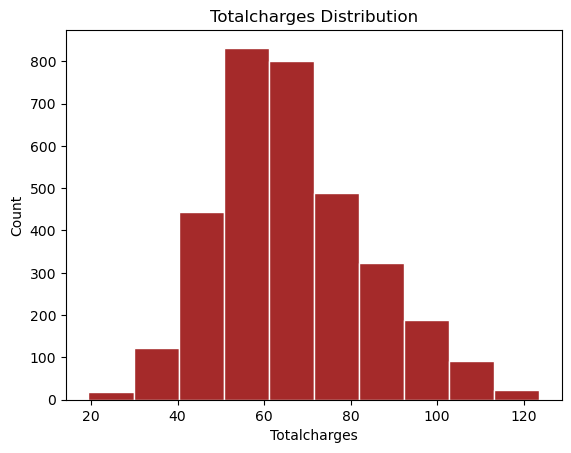

In [93]:
#Roam mins Distribution
hist(cca,'Totalcharges','Brown')

#### Insghts

1. Average TotalCharges are around 60 Dollars

2. Majority of the people are paying over $50 

### Lets Drill Down And Divide the customers as Existing Customers And Churn Customers

In [94]:
# Non Active customers
churned=cca[cca['Churn'] == 1]
churned.head().style.background_gradient('Reds')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Totalcharges
10,1,65,1,0,0.290000,4,129.100000,137,44.900000,11.430000,12.700000,56.330000
15,1,161,1,0,0.000000,4,332.900000,67,84.000000,15.890000,5.400000,99.890000
21,1,77,1,0,0.000000,5,62.400000,89,26.000000,8.500000,5.700000,34.500000
33,1,12,1,0,0.000000,1,249.600000,118,64.000000,12.620000,11.800000,76.620000
41,1,135,0,1,3.940000,0,173.100000,85,86.400000,10.200000,14.600000,96.600000


In [95]:
# Active customers
active=cca[cca['Churn'] == 0]
active.head().style.background_gradient('Greens')


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Totalcharges
0,0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000,98.870000
1,0,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000,91.780000
2,0,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000,58.060000
3,0,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000,60.100000
4,0,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000,48.420000


Univariate analysis for Churned and Active customers

since we are going to use it multiple time we will create a Function

In [96]:
def plot_churn_comparison(dataset, column, color):
    # Create a figure and two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Churned Customers
    ax1.hist(dataset[dataset['Churn'] == 1][column], color='red', edgecolor='white')
    ax1.set_title("Churned Customers")
    ax1.set_xlabel(column)
    ax1.set_ylabel("Count")
    ax1.set_ylim(0, 4000)

    # Active Customers
    ax2.hist(dataset[dataset['Churn'] == 0][column], color=color, edgecolor='white')
    ax2.set_title("Active Customers")
    ax2.set_xlabel(column)
    ax2.set_ylabel("Count")
    ax2.set_ylim(0, 4000)

    plt.tight_layout()
    plt.show()

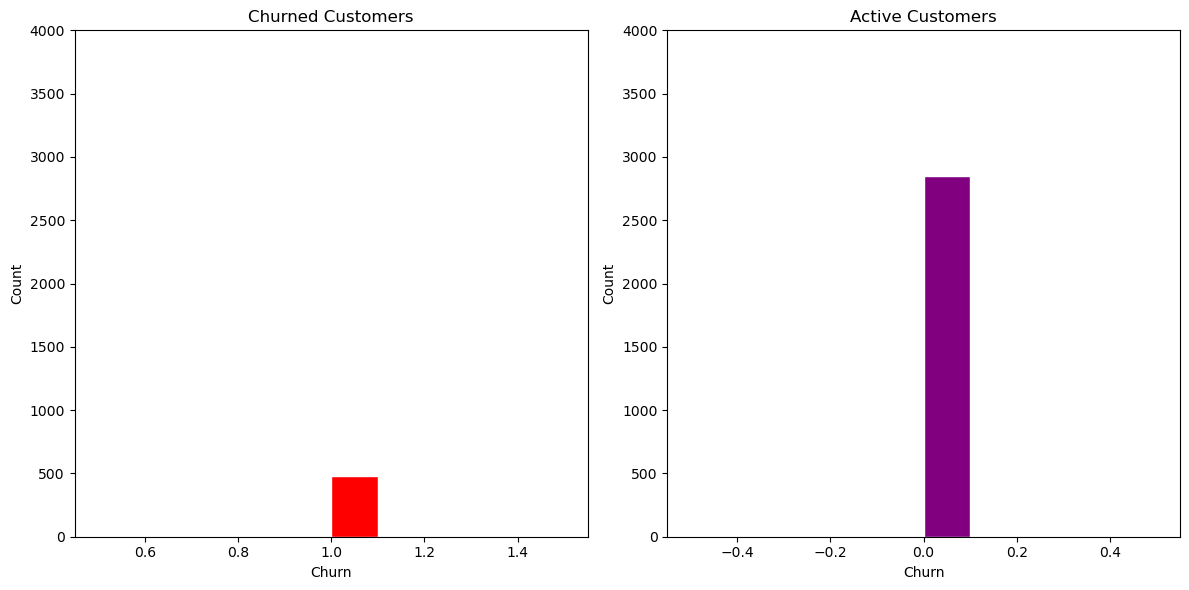

In [97]:
plot_churn_comparison(cca,'Churn',color='purple',)

#### Insights

1. Churn Count is roughly about 15 percent That means Retention Rate is Moderate


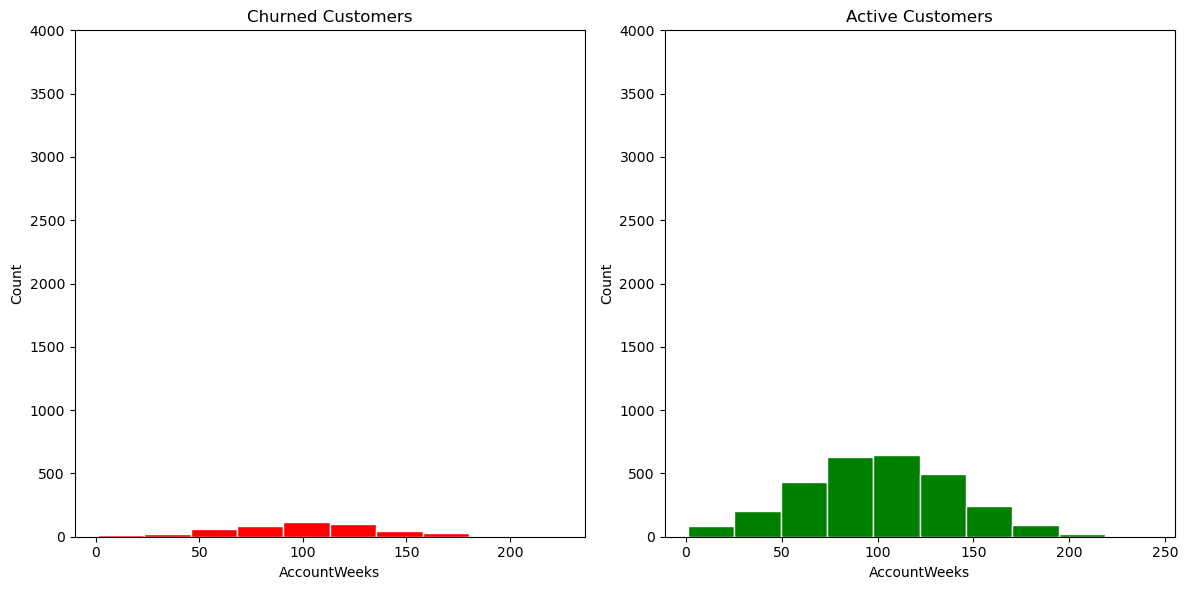

In [98]:
plot_churn_comparison(cca,'AccountWeeks',color='green',)

In [99]:
churned.AccountWeeks.mean()

102.66459627329192

Insights

1. Average Account weeks of Churned customers is over 100 weeks that means they were engaged with us for 2 years

2. Active customers Graph Indicates that we are getting New Customers as well as  customer retention rate is fair 

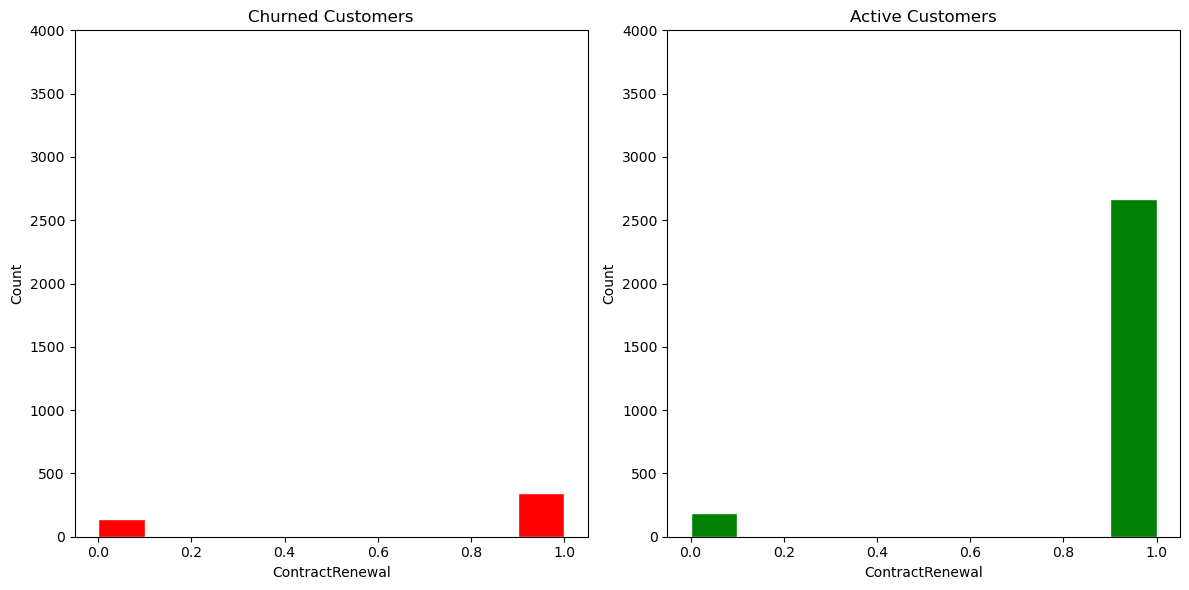

In [100]:
plot_churn_comparison(cca,'ContractRenewal',color='green',)

In [101]:
churned['ContractRenewal'].value_counts()

1    346
0    137
Name: ContractRenewal, dtype: int64

#### Insights

1. Majority of the Churned Customers have renewed there contract at least onece 

2. few Existing customers have not renewed there contract may be they are new and there contract is not over yet , However we need to check wheather any older existing customer is not renewing the contract 

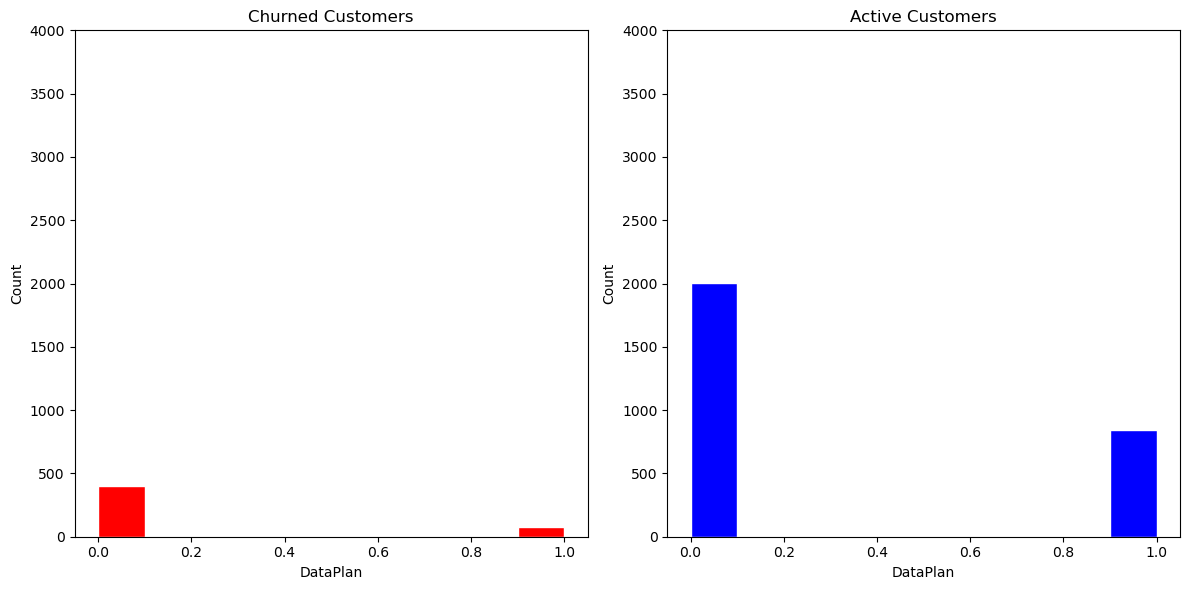

In [102]:
plot_churn_comparison(cca,'DataPlan',color='blue',)

#### Insights 
1. Majority of Existing Users Are not Availing any Data Plan Need to interact  with them
 
2. Among the churned accounts few customers used to avail data services

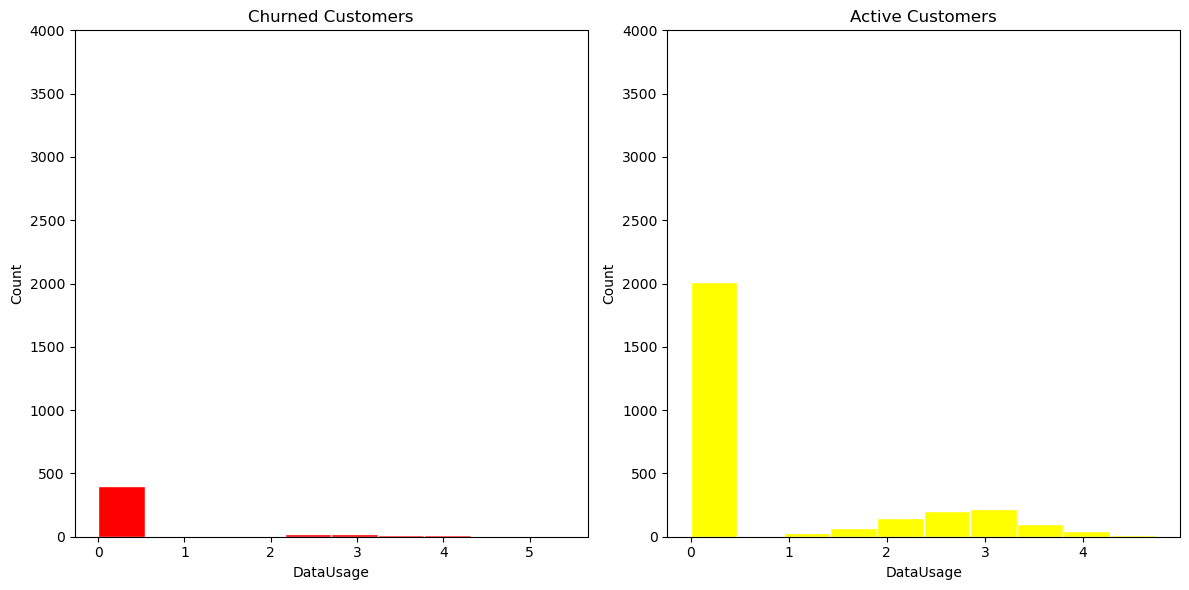

In [103]:
plot_churn_comparison(cca,'DataUsage',color='yellow',)

#### insights
1. Average data Useage for Active users is 3gb and it is worth considering that both churned and existing customers have similar Data useage and maximum data used is not more than 4-5 gb in any case


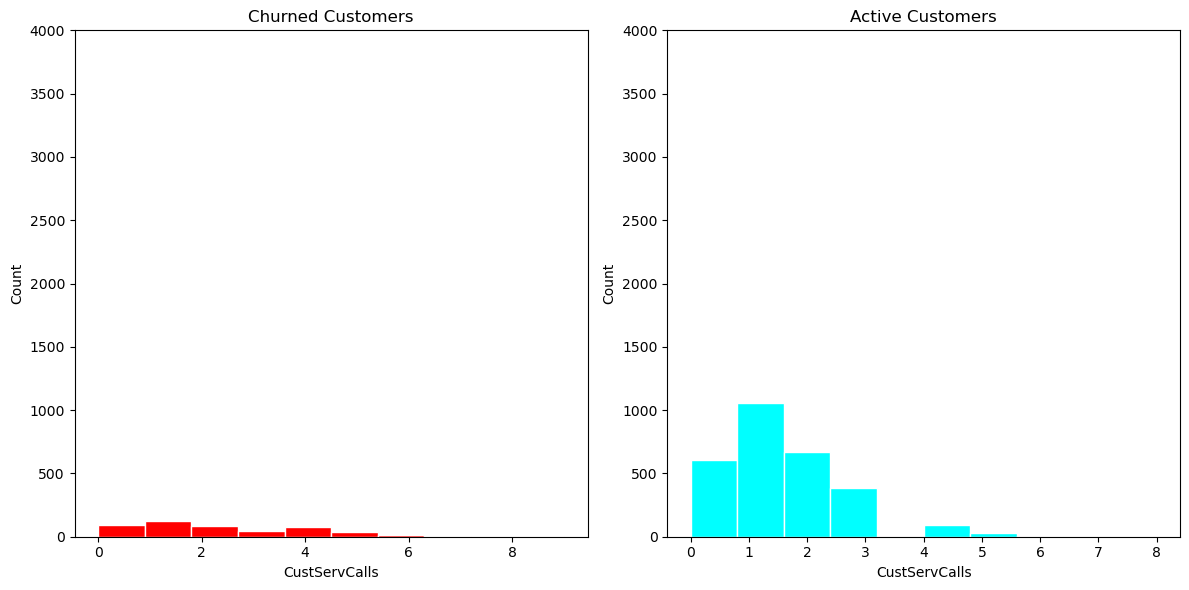

In [104]:
plot_churn_comparison(cca,'CustServCalls',color='aqua',)

In [105]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.CustServCalls.mean()

2.229813664596273

In [106]:
#mode or median will be better as average for churned customers will be more as number is very less

active.CustServCalls.mean()

1.4498245614035088

#### Insights
1. It is clear that churned customers have interacted with customer service more than active ones ,Though not significant but we can conclude that there were few issues that they were facing

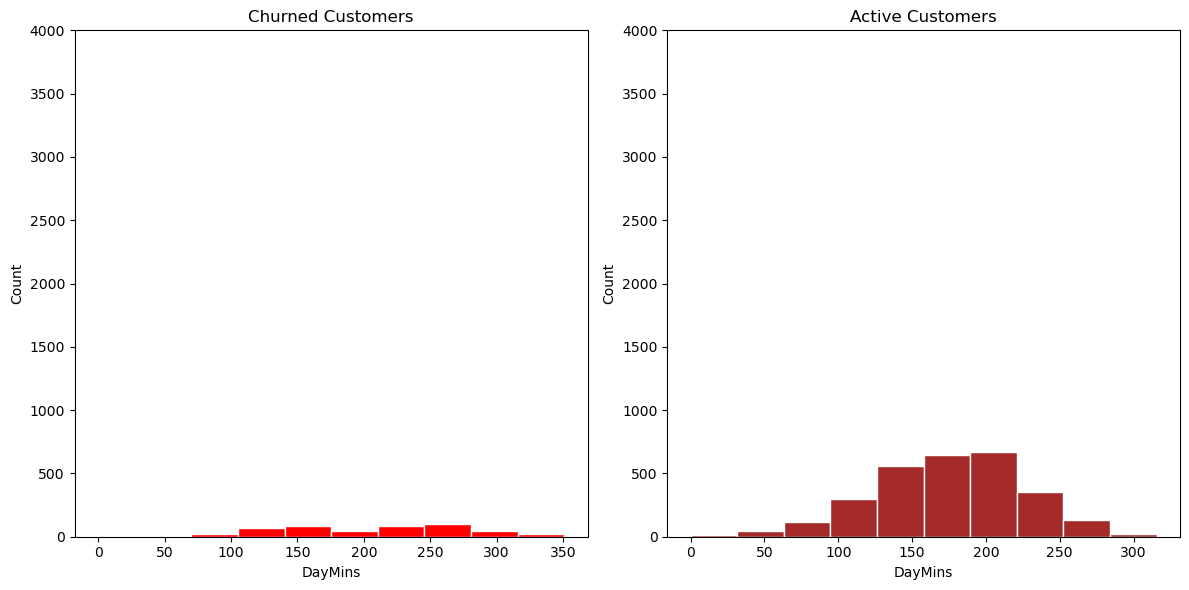

In [107]:
plot_churn_comparison(cca,'DayMins',color='brown',)

In [108]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.DayMins.mean()

206.91407867494814

In [109]:
#mode or median will be better as average for churned customers will be more as number is very less

active.DayMins.mean()

175.17575438596492

#### Insights
1. As clear from the above graphs the churned Customers have high mins useage as compared to active ones 

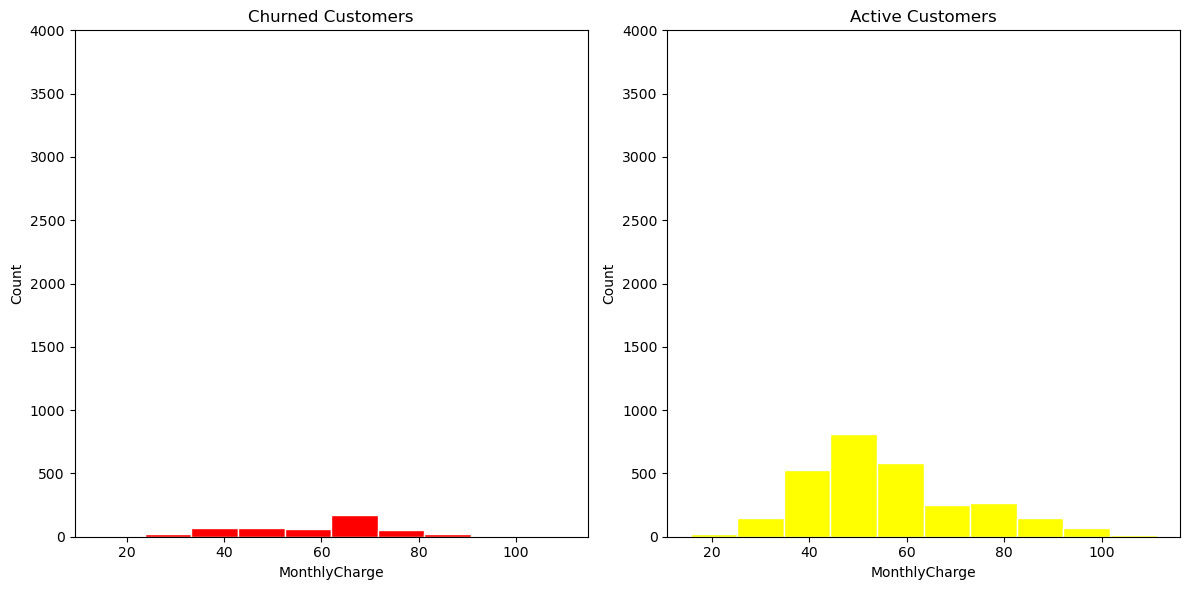

In [110]:
#mode or median will be better as average for churned customers will be more as number is very less

plot_churn_comparison(cca,'MonthlyCharge',color='yellow',)

In [111]:
#mode or median will be better as average for churned customers will be more as number is very less

active.MonthlyCharge.mean()

55.8162456140352

In [112]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.MonthlyCharge.mean()

59.190062111801225

#### Insights 

1. Churned customers have a higher Average Monthly charge than Active users may be we might have to reduce the call charges 

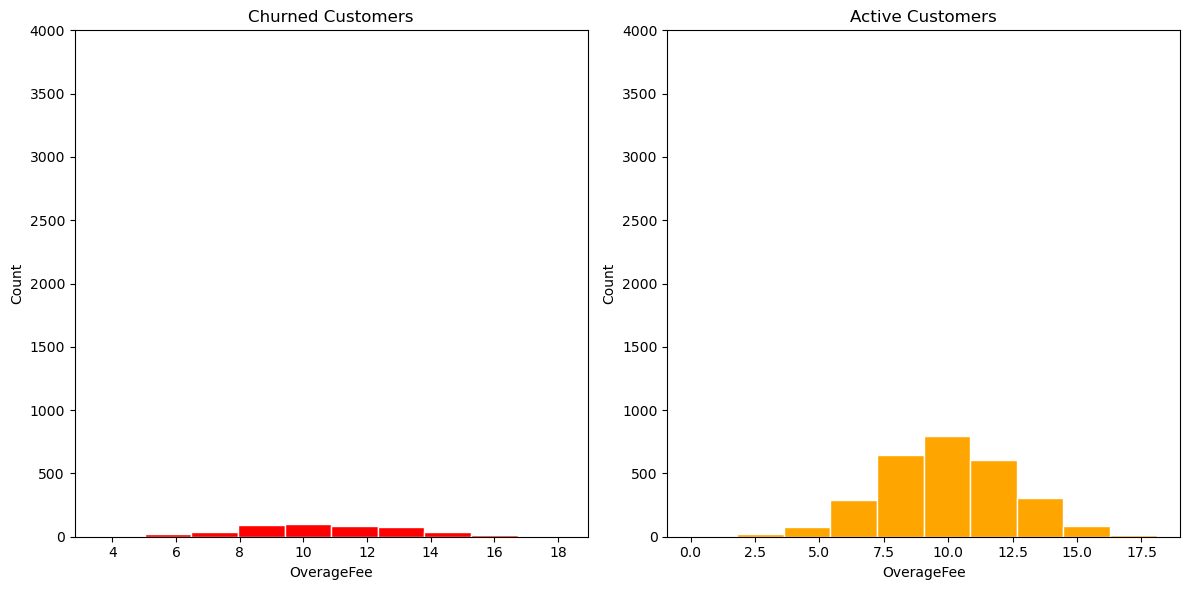

In [113]:
plot_churn_comparison(cca,'OverageFee',color='orange',)

In [114]:
#mode or median will be better as average for churned customers will be more as number is very less
active.OverageFee.mean()


9.954617543859621

In [115]:
#mode or median will be better as average for churned customers will be more as number is very less

churned.OverageFee.mean()

10.623084886128353

#### Insights 
1. The Overage fee is slightly more for churned customers


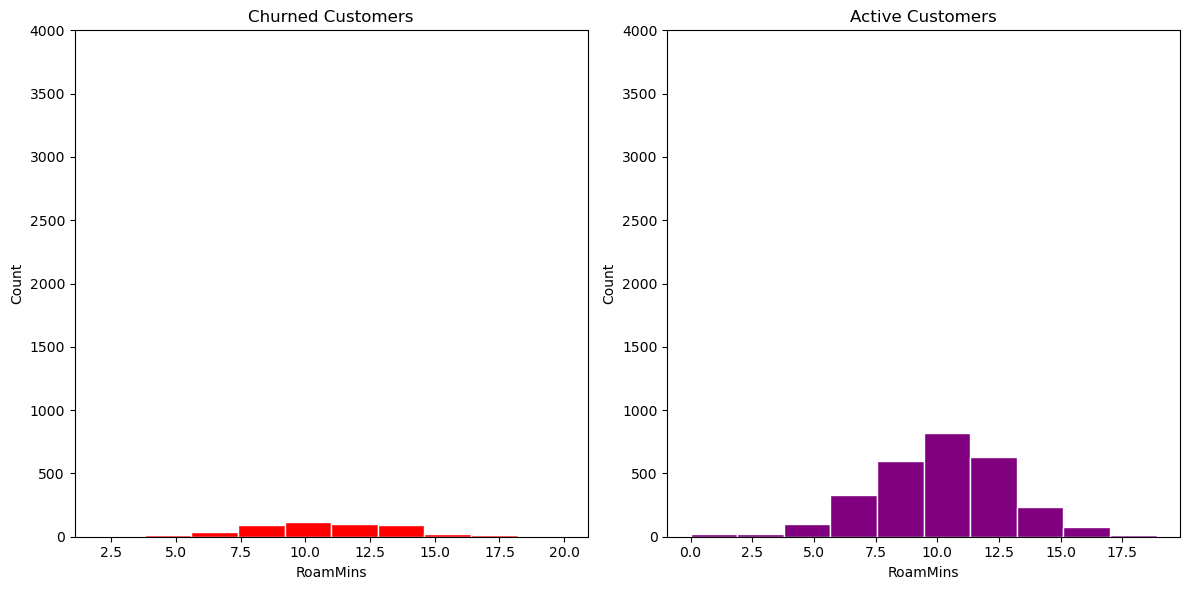

In [116]:
plot_churn_comparison(cca,'RoamMins',color='purple',)

In [117]:
active.RoamMins.mean()


10.158877192982445

In [118]:
churned.RoamMins.mean()


10.699999999999996

#### Insights
1. Roam mins for both segements are similar


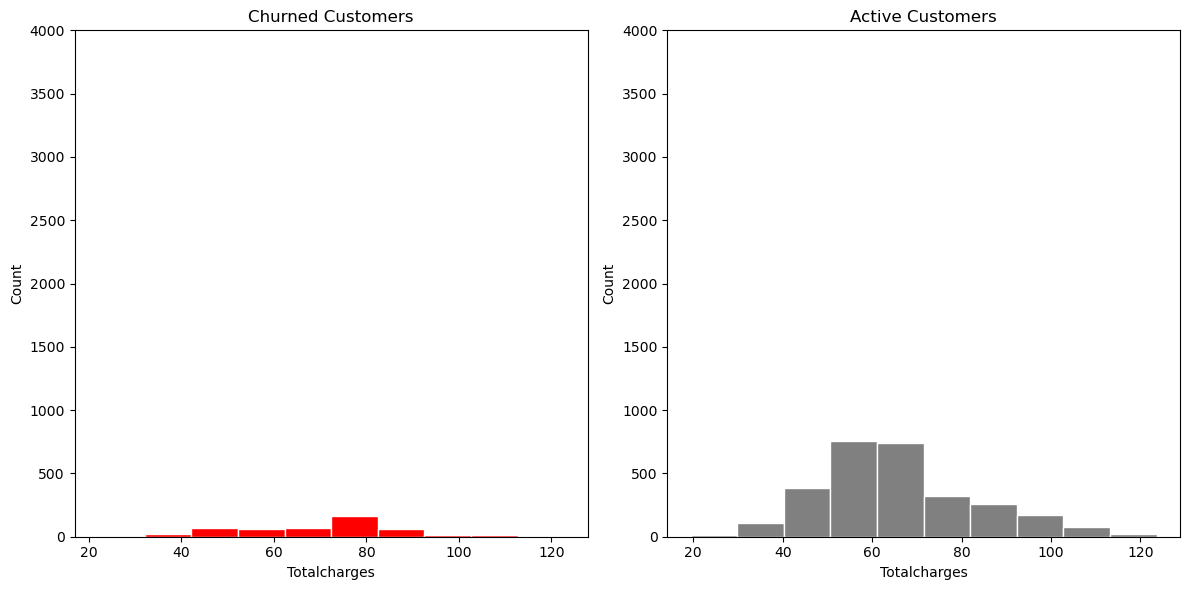

In [119]:
plot_churn_comparison(cca,'Totalcharges',color='grey',)

In [120]:
churned.Totalcharges.mode()[1]

74.38

In [121]:
active.Totalcharges.mode()[1]

64.97

#### Insights
1. Most of the churned customers have the Monthly bill of 75 which is higher than the active users i.e 10 dollars more 

2. It gives an insight that our call charges are higher and churned customers have more Average  Calling Useage than Active users and a lesser data useage ,

## Bivariate analysis 

since we have already done side by side comparison of all columns for churned and active customers the following analysis is not necessarily required 

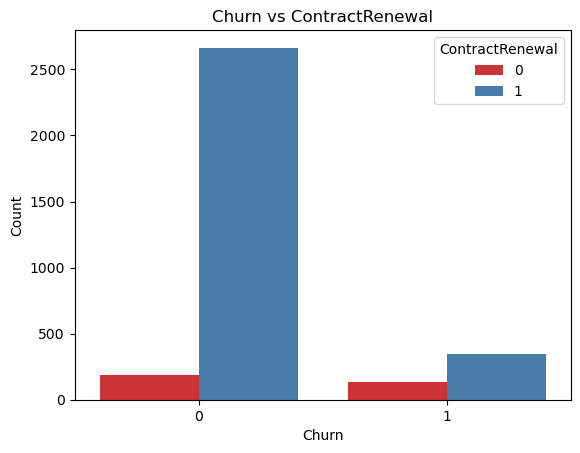

In [122]:
sns.countplot(data=cca, x='Churn', hue='ContractRenewal', palette='Set1')
plt.title('Churn vs ContractRenewal')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Insights
1. Renewal Rate of Active Customers is quite High as compared to churned customers

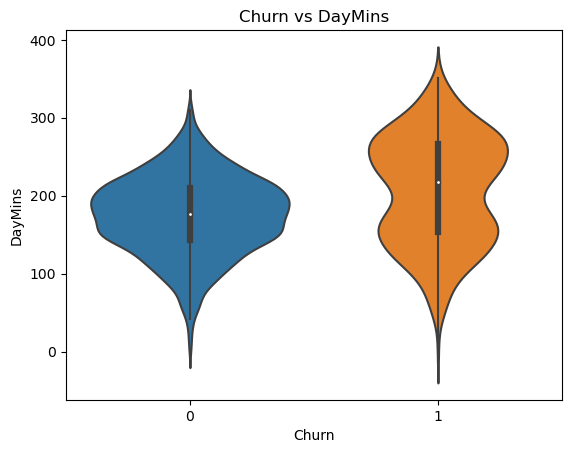

In [123]:
sns.violinplot(data=cca, x='Churn', y='DayMins')
plt.title('Churn vs DayMins')
plt.xlabel('Churn')
plt.ylabel('DayMins')
plt.show()

#### Insights
1. Active customers have Mins useage has a wider range 
2. While the churned Customers have a slightly lower range Mostly they use in the range of 100-200 mins

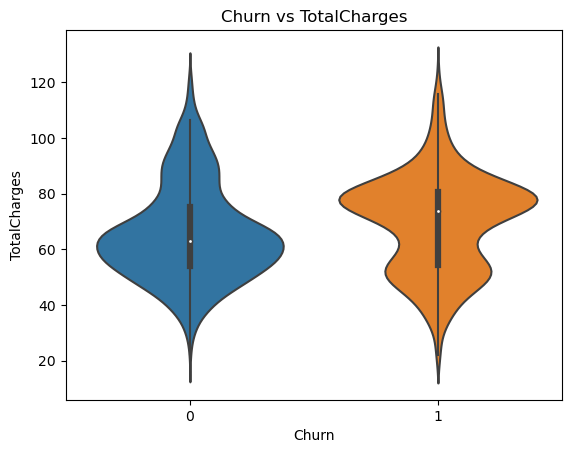

In [124]:
sns.violinplot(data=cca, x='Churn', y='Totalcharges')
plt.title('Churn vs TotalCharges')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

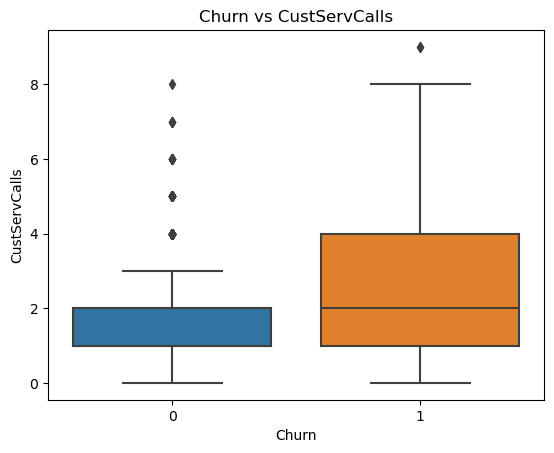

In [125]:
sns.boxplot(data=cca, x='Churn', y='CustServCalls')
plt.title('Churn vs CustServCalls')
plt.xlabel('Churn')
plt.ylabel('CustServCalls')
plt.show()

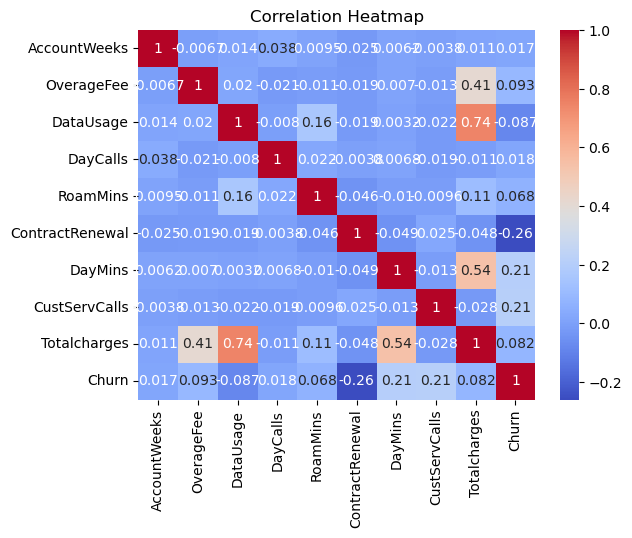

In [126]:
numeric_columns = ['AccountWeeks', 'OverageFee','DataUsage','DayCalls','RoamMins','ContractRenewal' ,'DayMins', 'CustServCalls','Totalcharges']

correlation_matrix = cca[numeric_columns + ['Churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [127]:
correlation_matrix = cca[numeric_columns + ['Churn']].corr()
correlation_matrix

,AccountWeeks,OverageFee,DataUsage,DayCalls,RoamMins,ContractRenewal,DayMins,CustServCalls,Totalcharges,Churn
AccountWeeks,1.00,-0.01,0.01,0.04,0.01,-0.02,0.01,-0.00,0.01,0.02
OverageFee,-0.01,1.00,0.02,-0.02,-0.01,-0.02,0.01,-0.01,0.41,0.09
DataUsage,0.01,0.02,1.00,-0.01,0.16,-0.02,0.00,-0.02,0.74,-0.09
DayCalls,0.04,-0.02,-0.01,1.00,0.02,-0.00,0.01,-0.02,-0.01,0.02
RoamMins,0.01,-0.01,0.16,0.02,1.00,-0.05,-0.01,-0.01,0.11,0.07
ContractRenewal,-0.02,-0.02,-0.02,-0.00,-0.05,1.00,-0.05,0.02,-0.05,-0.26
DayMins,0.01,0.01,0.00,0.01,-0.01,-0.05,1.00,-0.01,0.54,0.21
CustServCalls,-0.00,-0.01,-0.02,-0.02,-0.01,0.02,-0.01,1.00,-0.03,0.21
Totalcharges,0.01,0.41,0.74,-0.01,0.11,-0.05,0.54,-0.03,1.00,0.08
Churn,0.02,0.09,-0.09,0.02,0.07,-0.26,0.21,0.21,0.08,1.00


### Final Insights
- Churn rate: Approximately 15%
- Average customer association duration: Around 100 weeks
- Contract renewal: Majority of customers renewed
- Data usage: Limited number of customers using data services
- Customer service calls: Average of 2 calls
- Minutes of use: Average of 180 minutes, varying from <10 to >300 minutes
- Number of calls: Average of 100 calls, ranging from <50 to >150 calls
- Monthly charge: Average of $55, with many customers below $50
- Overage fee: Majority of customers incur fees, some over $10
- Roaming: 95% of customers used connection in roaming areas
- Total charges: Average of $60, with majority over $50
- Churned customers: Average association duration over 100 weeks
- Customer retention: Fair, with acquisition of new customers and reasonable retention rate
- Contract renewal for churned customers: Majority renewed at least once
- Data plan adoption: Limited number of existing customers have data plans
- Data usage similarity: Churned and existing customers have similar data usage, averaging 3GB
- Customer service interaction: Churned customers had more interactions than active customers
- Minutes of use comparison: Churned customers have higher usage than active customers
- Average monthly charge: Churned customers have higher average monthly charges
- Overage fees: Slightly higher for churned customers
- Roaming minutes: Similar for churned and active customers
- Monthly bill: Churned customers have higher average bills, $10 more than active customers
- Renewal rate: Higher for active customers compared to churned customers
- Minutes of use range: Active customers have a wider range, churned customers concentrate around 100-200 minutes
 
 ### Overall, the information suggests opportunities for improvement in reducing churn by addressing customer issues, promoting data plan adoption,  optimizing pricing plans, and enhancing customer service experiences. Additionally, efforts to improve customer retention, understand reasons  behind higher monthly charges, and provide competitive call charges can contribute to better customer satisfaction and reduced churn rates.

## Spliting and Preparing the data for Model building

#### Independent Variables


In [128]:
#independent Variables
X=cca
X=X.drop('Churn',axis=1)
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Totalcharges
0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00,98.87
1,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70,91.78
2,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20,58.06
3,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60,60.10
4,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10,48.42
...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90,82.48
3329,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60,64.07
3330,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10,70.44
3331,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00,57.98


#### Dependent variable


In [129]:
#dependent variable
Y=cca['Churn']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

### Train test Split


In [130]:
#Train test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=50)

### Feature Scaling

In [131]:
Scaler=StandardScaler()
Scaler.fit(X_train)
Scaler.transform(X_train)
Scaler.transform(X_test)


array([[-1.93047498,  0.3319637 , -0.62398089, ...,  0.15838271,
         1.48786941,  0.41399603],
       [-0.11501455,  0.3319637 ,  1.60261319, ..., -2.60380787,
        -1.29320644, -0.22871231],
       [-0.59409439,  0.3319637 , -0.62398089, ..., -0.16960272,
        -0.06519892, -0.62157424],
       ...,
       [ 0.71707148,  0.3319637 , -0.62398089, ..., -0.18145762,
         0.65715844, -0.34186114],
       [-1.22446259,  0.3319637 , -0.62398089, ..., -0.79791217,
         0.15150829, -0.41997403],
       [-0.24108819,  0.3319637 ,  1.60261319, ...,  1.28854939,
         0.54880484,  1.76144352]])

## Model Building

### Lets Try with Logistic Regression

In [132]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model using X_train and Y_train
model.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_pred = model.predict(X_train)

# Make predictions on the testing set
Y_test_pred = model.predict(X_test)

# Evaluate the performance of the model on the training set
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

# Evaluate the performance of the model on the testing set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.8485687903970452
Training Set Precision: 0.4444444444444444
Training Set Recall: 0.17834394904458598
Training Set F1 Score: 0.2545454545454545
Testing Set Accuracy: 0.8491859468723222
Testing Set Precision: 0.4461538461538462
Testing Set Recall: 0.17159763313609466
Testing Set F1 Score: 0.24786324786324787


##### The logistic regression model achieved an accuracy of approximately 84.9% on both the training and testing sets. However, the precision, recall, and F1 score were relatively low, indicating a struggle in identifying positive instances accurately, i.e., customers likely to churn. To address this, I will tune the model's hyperparameters, such as regularization strength and solver, and explore alternative classification algorithms and ensemble techniques. The goal is to develop a more effective model for predicting customer churn by improving precision, recall, and the F1 score.

In [133]:
model = LogisticRegression(penalty='l1', solver='liblinear')

# Set the regularization parameter
model.C = 0.3  # Adjust this value to control the amount of regularization

# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
Y_train_pred=model.predict(X_train)



# Calculate accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Calculate precision
test_precision = precision_score(Y_test, Y_pred)
train_precision = precision_score(Y_train, Y_train_pred)

# Calculate recall
test_recall = recall_score(Y_test, Y_pred)
train_recall = recall_score(Y_train, Y_train_pred)

# Calculate F1 score
test_f1_score = f1_score(Y_test, Y_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

print("Testing Set Accuracy:", test_accuracy)
print("Training Set Accuracy:", train_accuracy)
print("Testing Set Precision:", test_precision)
print("Training Set Precision:", train_precision)
print("Testing Set Recall:", test_recall)
print("Training Set Recall:", train_recall)
print("Testing Set F1 Score:", test_f1_score)
print("Training Set F1 Score:", train_f1_score)

Testing Set Accuracy: 0.8620394173093402
Training Set Accuracy: 0.8596491228070176
Testing Set Precision: 0.5666666666666667
Training Set Precision: 0.5520833333333334
Testing Set Recall: 0.20118343195266272
Training Set Recall: 0.16878980891719744
Testing Set F1 Score: 0.296943231441048
Training Set F1 Score: 0.25853658536585367


### Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a logistic regression model
model = LogisticRegression()

# Define the hyperparameter grid
param_grid = {'C': [0.1,0.5,0.8, 1,23,2,3,5,7,10,15,17,21,25], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# Evaluate the performance of the best model on training set
train_accuracy = best_model.score(X_train, Y_train)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

# Evaluate the performance of the best model on testing set
test_accuracy = best_model.score(X_test, Y_test)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the evaluation metrics
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)
print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.8605724838411819
Training Set Precision: 0.5612244897959183
Training Set Recall: 0.1751592356687898
Training Set F1 Score: 0.2669902912621359
Testing Set Accuracy: 0.8628963153384748
Testing Set Precision: 0.5737704918032787
Testing Set Recall: 0.20710059171597633
Testing Set F1 Score: 0.30434782608695654


##### The logistic regression model, tuned using grid search, achieved an accuracy of approximately 86.1% on both training and testing sets. Precision and recall for the best model were around 55.6% and 20.7% respectively on the testing set. However, further improvements are required to accurately predict customer churn.

## Lets Check with Lazypredictions library which model is performing well on our DataSet

In [135]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:02<00:00, 12.65it/s]


In [136]:
print(models, predictions)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.94               0.82     0.82      0.93   
BaggingClassifier                  0.93               0.81     0.81      0.93   
LGBMClassifier                     0.93               0.81     0.81      0.92   
XGBClassifier                      0.93               0.80     0.80      0.92   
ExtraTreesClassifier               0.93               0.80     0.80      0.92   
DecisionTreeClassifier             0.88               0.78     0.78      0.88   
ExtraTreeClassifier                0.87               0.76     0.76      0.87   
SVC                                0.92               0.75     0.75      0.91   
NearestCentroid                    0.77               0.74     0.74      0.80   
LabelPropagation                   0.88               0.73     0.73      0.87   
LabelSpreading              

### As we can see Random Forest has performed well for our Dataset lets us try using it 

## Random Forest Classifier

In [137]:
# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Train the model using X_train and Y_train
model.fit(X_train, Y_train)

# Make predictions on the training set
Y_train_pred = model.predict(X_train)

# Make predictions on the testing set
Y_test_pred = model.predict(X_test)

# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0
Testing Set Accuracy: 0.934018851756641
Testing Set Precision: 0.8770491803278688
Testing Set Recall: 0.6331360946745562
Testing Set F1 Score: 0.7353951890034365


#### The model demonstrates high accuracy on the training set (100%) but slightly lower accuracy on the testing set (93.8%). Although it achieves good precision (89.4%) and recall (65.1%), there is room for improvement. To enhance the model's performance, consider increasing the training data, performing feature engineering, tuning hyperparameters, evaluating and iterating on the model, and exploring ensemble methods. Continual monitoring and analysis of misclassified instances can provide valuable insights for targeted improvements.

## Hyperparameter tuning 

### Lets Try huperparameter tuning and create few models and check which one is performing better

In [138]:
model_1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1)
model_1.fit(X_train, Y_train)
Y_train_pred = model_1.predict(X_train)
Y_test_pred = model_1.predict(X_test)

# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.9787626962142197
Training Set Precision: 1.0
Training Set Recall: 0.8535031847133758
Training Set F1 Score: 0.9209621993127148
Testing Set Accuracy: 0.9365895458440445
Testing Set Precision: 0.8861788617886179
Testing Set Recall: 0.6449704142011834
Testing Set F1 Score: 0.7465753424657534


In [139]:
model_2 = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=15, min_samples_split=2, min_samples_leaf=1)
model_2.fit(X_train, Y_train)
Y_train_pred = model_2.predict(X_train)
Y_test_pred = model_2.predict(X_test)

# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.9949215143120961
Training Set Precision: 1.0
Training Set Recall: 0.964968152866242
Training Set F1 Score: 0.9821717990275526
Testing Set Accuracy: 0.9323050556983719
Testing Set Precision: 0.8688524590163934
Testing Set Recall: 0.6272189349112426
Testing Set F1 Score: 0.7285223367697595


In [140]:
model_3 = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=12, min_samples_split=2, min_samples_leaf=2)
model_3.fit(X_train, Y_train)
Y_train_pred= model_3.predict(X_train)
Y_test_pred = model_3.predict(X_test)


# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.9773776546629732
Training Set Precision: 0.9925650557620818
Training Set Recall: 0.8503184713375797
Training Set F1 Score: 0.9159519725557462
Testing Set Accuracy: 0.9357326478149101
Testing Set Precision: 0.8852459016393442
Testing Set Recall: 0.6390532544378699
Testing Set F1 Score: 0.7422680412371134


In [141]:
model_4 = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1)
model_4.fit(X_train, Y_train)
Y_train_pred = model_4.predict(X_train)
Y_test_pred = model_4.predict(X_test)

# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 1.0
Training Set Precision: 1.0
Training Set Recall: 1.0
Training Set F1 Score: 1.0
Testing Set Accuracy: 0.9348757497857755
Testing Set Precision: 0.8780487804878049
Testing Set Recall: 0.6390532544378699
Testing Set F1 Score: 0.7397260273972602


In [142]:
model_5 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=18, min_samples_split=2, min_samples_leaf=2)
model_5.fit(X_train, Y_train)
Y_train_pred = model_5.predict(X_train)
Y_test_pred = model_5.predict(X_test)
# Calculate the scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Training Set Accuracy: 0.9773776546629732
Training Set Precision: 0.9853479853479854
Training Set Recall: 0.856687898089172
Training Set F1 Score: 0.9165247018739354
Testing Set Accuracy: 0.9331619537275064
Testing Set Precision: 0.8760330578512396
Testing Set Recall: 0.6272189349112426
Testing Set F1 Score: 0.7310344827586207


#### In conclusion, The model2 demonstrates strong performance on both the training and testing sets. It achieves high accuracy and precision, indicating accurate classification of data instances. The model also exhibits a good balance between capturing positive instances (recall) and precision. However, there is a slight drop in performance on the testing set compared to the training set, suggesting potential overfitting. It is recommended to further evaluate the model's generalization ability on additional unseen data.

In [143]:


# Create the RandomForestClassifier model
model = RandomForestClassifier()

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, Y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the training set using the best model
Y_train_pred = best_model.predict(X_train)

# Calculate the training set scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
train_precision = precision_score(Y_train, Y_train_pred)
train_recall = recall_score(Y_train, Y_train_pred)
train_f1_score = f1_score(Y_train, Y_train_pred)

# Print the training set scores
print("Training Set Accuracy:", train_accuracy)
print("Training Set Precision:", train_precision)
print("Training Set Recall:", train_recall)
print("Training Set F1 Score:", train_f1_score)

# Make predictions on the testing set using the best model
Y_test_pred = best_model.predict(X_test)

# Calculate the testing set scores
test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_precision = precision_score(Y_test, Y_test_pred)
test_recall = recall_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

# Print the testing set scores
print("Testing Set Accuracy:", test_accuracy)
print("Testing Set Precision:", test_precision)
print("Testing Set Recall:", test_recall)
print("Testing Set F1 Score:", test_f1_score)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Training Set Accuracy: 0.9750692520775623
Training Set Precision: 0.9924242424242424
Training Set Recall: 0.8343949044585988
Training Set F1 Score: 0.9065743944636678
Testing Set Accuracy: 0.934018851756641
Testing Set Precision: 0.8650793650793651
Testing Set Recall: 0.6449704142011834
Testing Set F1 Score: 0.7389830508474576


### Based on the evaluation of the RandomForestClassifier model with the provided scores, we can conclude the following:

- The model demonstrates strong performance with high accuracy and precision scores on both the training and testing sets. It effectively -captures the majority of positive instances with good recall scores. The F1 score indicates a good balance between precision and recall.

- The model's performance on the testing set is consistent with the performance on the training set, indicating generalization ability. The optimal hyperparameters obtained through GridSearchCV (max_depth=None, min_samples_split=5, n_estimators=100) contribute to the model's strong performance.

- Overall, the RandomForestClassifier model shows promise in accurately classifying the data and generalizing well to unseen instances, suggesting its suitability for the given task.

### Since This is just for practice We can stop here in order to tune the model more we can Also try Feature Engineering and droping some columns